In [75]:
import cv2
import numpy as np
from IPython.display import display, Image

In [76]:
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def display_image(image, format='.jpg'):
    decoded_bytes = cv2.imencode(format, image)[1].tobytes()
    display(Image(data=decoded_bytes))

def get_image(filename):
    return cv2.imread(filename, cv2.IMREAD_COLOR)
    
def to_gray(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def get_face(img):
    return faceCascade.detectMultiScale(img, 1.1, 3)

def set_rect(img, face, color):
    if len(face) > 0:
        for rect in face:
            cv2.rectangle(img, tuple(rect[0: 2]), tuple(rect[0: 2] + rect[2: 4]), color, thickness=2)

def trim_image(img, rect):
    x = rect[0]
    y = rect[1]
    w = rect[2]
    h = rect[3]
    return img[y: y + h, x: x + w]

In [77]:
img1 = get_image('akimoto.jpg')
gray1 = to_gray(img1)
face1 = get_face(gray1)

img2 = get_image('nogizaka.jpg')
gray2 = to_gray(img2)
face2 = get_face(gray2)

In [78]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
detector = cv2.AKAZE_create()

In [81]:
NORMSIZE = (200, 200)
COLOR_RED = (0, 0, 255)
COLOR_BLUE = (255, 0, 0)

ref = cv2.resize(trim_image(gray1, face1[0]), NORMSIZE)
(ref_kp, ref_des) = detector.detectAndCompute(ref, None)

i = 0
mx = 10000000
mx_i = 0
for rect in face2:
    tgt = cv2.resize(trim_image(gray2, rect), NORMSIZE)
    (tgt_kp, tgt_des) = detector.detectAndCompute(tgt, None)
    matches = bf.match(ref_des, tgt_des)
    dist = [m.distance for m in matches]
    ret = sum(dist) / len(dist)
    #print(i, ret)
    if ret < mx:
        mx = ret
        mx_i = i
    i += 1

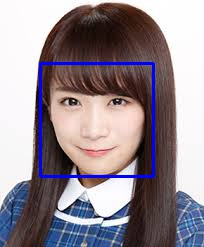

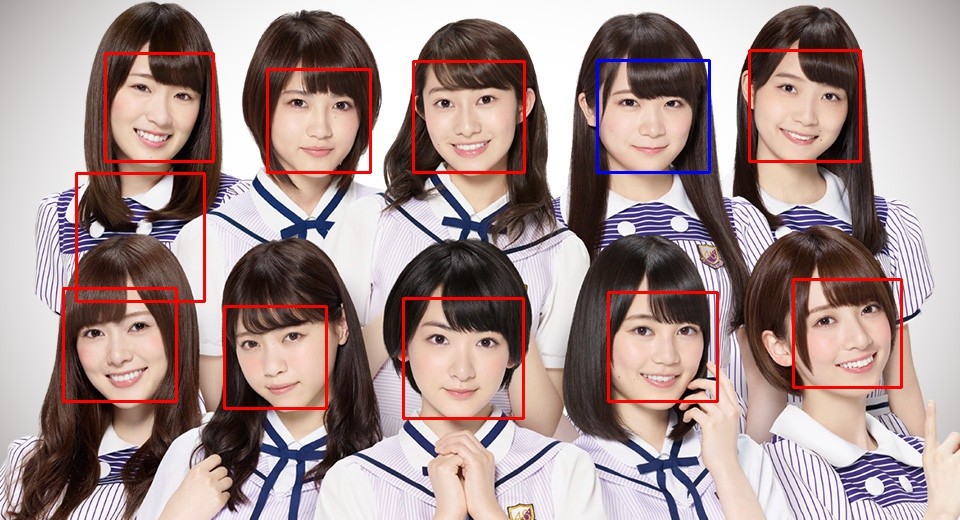

In [80]:
set_rect(img1, face1, COLOR_BLUE)
set_rect(img2, face2, COLOR_RED)
set_rect(img2, [face2[mx_i]], COLOR_BLUE)
display_image(img1, '.jpg')
display_image(img2, '.jpg')